In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('charts.csv') #Loading the CSV File

In [6]:
df.head()  # Shows top 5 rows

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [18]:
df.tail()     # Shows bottom 5 rows

,title,rank,date,artist,url,region,chart,trend,streams
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN
26173513,Letter to Jarad,50,2021-07-31,"LRN Slime, Shiloh Dynasty",https://open.spotify.com/track/508QhA2SncMbh5C...,Vietnam,viral50,MOVE_DOWN,NaN


In [10]:
df.shape      # Shape of the Dataset (rows, columns)

(26173514, 9)

In [11]:
df.info()      # Info About Columns (Data types, non-null counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [13]:
df.isnull().sum()      #Check for Missing Values

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [15]:
df.columns.tolist()                     #View Column Names

['title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'chart',
 'trend',
 'streams']

In [16]:
df.describe()         #summary statistics (like mean, count, std, min, max, etc.)

,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [19]:
#Removing duplicates

In [21]:
print("Duplicate rows:", df.duplicated().sum())    # Count duplicates

Duplicate rows: 0


In [22]:
df = df.drop_duplicates()       # Drop duplicates

In [24]:
#Handling missing values

In [25]:
df = df.dropna(subset=['title', 'artist', 'date', 'rank'])

In [26]:
df['streams'] = df['streams'].fillna(0)

In [27]:
df.isnull().sum()

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [32]:
# Convert Data Types

In [30]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # invalid dates will become NaT

In [33]:
# Removing Outliers

In [34]:
# View stream stats
print(df['streams'].describe())

# Removing extremely high values beyond 99th percentile
upper_limit = df['streams'].quantile(0.99)
df = df[df['streams'] <= upper_limit]

# Removing negative/zero streams
df = df[df['streams'] > 0]


count    2.617348e+07
mean     4.290659e+04
std      1.861081e+05
min      0.000000e+00
25%      1.236000e+03
50%      5.555000e+03
75%      2.489900e+04
max      1.974970e+07
Name: streams, dtype: float64


In [35]:
df.reset_index(drop=True, inplace=True)         # Reset Index After Cleaning

In [36]:
#  Basic Statistics with NumPy

In [37]:
# Extract streams as a NumPy array
streams = df['streams'].values

In [38]:
mean_streams = np.mean(streams)         #mean
print("Mean Streams:", mean_streams)

Mean Streams: 36627.1107315584


In [39]:
median_streams = np.median(streams)       #median
print("Median Streams:", median_streams)

Median Streams: 9300.0


In [40]:
std_dev = np.std(streams)          #Standard Deviation
print("Standard Deviation:", std_dev)

Standard Deviation: 82187.39565568544


In [41]:
min_streams = np.min(streams)       #Minimum
max_streams = np.max(streams)       #Maximum

print("Min Streams:", min_streams)
print("Max Streams:", max_streams)


Min Streams: 1001.0
Max Streams: 794045.0


In [42]:
percentiles = np.percentile(streams, [25, 50, 75])         # 25th, 50th (median), and 75th Percentiles
print("25th Percentile:", percentiles[0])
print("50th Percentile (Median):", percentiles[1])
print("75th Percentile:", percentiles[2])

25th Percentile: 3495.0
50th Percentile (Median): 9300.0
75th Percentile: 33814.0


In [43]:
popular_count = np.sum(streams > 1_000_000)           # Count of Values Greater Than a Threshold
print("Tracks with over 1 million streams:", popular_count)

Tracks with over 1 million streams: 0


In [46]:
# Sort by Streams 
df_sorted_by_streams = df.sort_values('streams', ascending=False)
df_sorted_by_streams.head()

,title,rank,date,artist,url,region,chart,trend,streams
8028324,Take Me Back to London (feat. Stormzy),124,2019-07-29,Ed Sheeran,https://open.spotify.com/track/1AI7UPw3fgwAFkv...,Global,top200,MOVE_UP,794045.0
12746392,Quiéreme Mientras Se Pueda,149,2020-09-11,Manuel Turizo,https://open.spotify.com/track/34LI7rwi9H8w2S5...,Global,top200,MOVE_DOWN,794043.0
9035659,"10,000 Hours (with Justin Bieber)",17,2019-10-29,Dan + Shay,https://open.spotify.com/track/2wrJq5XKLnmhRXH...,United States,top200,MOVE_UP,794042.0
14879118,MORENA,146,2021-07-27,Luan Santana,https://open.spotify.com/track/4PQdrXMDHDPl1Rc...,Global,top200,MOVE_DOWN,794042.0
1843440,Berlin lebt,111,2018-06-09,Capital Bra,https://open.spotify.com/track/1uJ7IQJdeAvmUDp...,Global,top200,MOVE_UP,794040.0


In [47]:
# Advanced Pandas Operations

In [55]:
# Add a New Column

def categorize_popularity(streams):
    if streams >= 1_000_000:
        return '🔥 Viral'
    elif streams >= 500_000:
        return '🌟 Popular'
    else:
        return '🎧 Niche'

df['popularity'] = df['streams'].apply(categorize_popularity)
df[['title', 'streams', 'popularity']].head()

,title,streams,popularity
0,Chantaje (feat. Maluma),253019.0,🎧 Niche
1,Vente Pa' Ca (feat. Maluma),223988.0,🎧 Niche
2,Reggaetón Lento (Bailemos),210943.0,🎧 Niche
3,Safari,173865.0,🎧 Niche
4,Shaky Shaky,153956.0,🎧 Niche


In [57]:
# Group Data (Aggregation)
artist_avg_streams = df.groupby('artist')['streams'].mean().sort_values(ascending=False)    # average streams per artist 
artist_avg_streams.head()

artist
Tyler, The Creator, DAISY WORLD                                                     776706.000000
Burna Boy, Stormzy                                                                  738820.714286
Marvin Divine                                                                       737521.000000
Andrew Andraos, Esprit Ange Andraos                                                 640419.000000
True Damage, Becky G, Keke Palmer, SOYEON, Duckwrth, Thutmose, League of Legends    633157.500000
Name: streams, dtype: float64

In [59]:
# Merge Two Datasets

# Sample artist info
artist_info = pd.DataFrame({
    'artist': ['Taylor Swift', 'Bad Bunny', 'Drake'],
    'genre': ['Pop', 'Latin Trap', 'Hip-Hop']
})

# Merge on 'artist'
df_merged = pd.merge(df, artist_info, on='artist', how='left')

# Check result
df_merged[['artist', 'title', 'genre']].head()


,artist,title,genre
0,Shakira,Chantaje (feat. Maluma),NaN
1,Ricky Martin,Vente Pa' Ca (feat. Maluma),NaN
2,CNCO,Reggaetón Lento (Bailemos),NaN
3,"J Balvin, Pharrell Williams, BIA, Sky",Safari,NaN
4,Daddy Yankee,Shaky Shaky,NaN


In [60]:
# Pivot tables

In [65]:
# Total Streams per Artist per Chart
pivot1 = pd.pivot_table(
    df,
    values='streams',
    index='artist',
    columns='chart',
    aggfunc='sum',
    fill_value=0
)

pivot1.head()

chart,top200
artist,
#LikeMe Cast,279316.0
#TocoParaVos,4273142.0
"#TocoParaVos, El Reja, Marka Akme",4966734.0
$NOT,2989710.0
$OHO BANI,1386931.0


In [63]:
# Average Streams per Date and Region
pivot2 = pd.pivot_table(
    df,
    values='streams',
    index='date',
    columns='region',
    aggfunc='mean',
    fill_value=0
)

pivot2.head()

region,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Canada,Chile,Colombia,...,Switzerland,Taiwan,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,39444.360,26888.89,3095.320,4800.250,2171.727273,70531.330,1628.000000,33027.155,24967.27,7774.375,...,3953.790,4376.390,0.0,7868.600,0.0,0.0,58524.200,254555.687179,2806.587940,0.0
2017-01-02,30050.205,31950.39,3591.960,5503.590,2037.886792,68942.615,1346.500000,27901.340,19110.61,8111.690,...,4605.395,5196.195,0.0,8973.690,0.0,0.0,67086.030,231943.659898,2762.065934,0.0
2017-01-03,29609.535,33245.42,3641.350,5647.945,2161.653333,70813.460,1262.076923,30788.905,21980.46,8700.460,...,4923.945,5707.040,0.0,9157.720,0.0,0.0,72550.595,259132.515306,2639.711538,0.0
2017-01-04,30097.865,33977.01,3703.660,5708.425,2132.602564,72240.285,1364.888889,32098.950,22250.38,8685.300,...,4918.020,5862.070,0.0,9176.585,0.0,0.0,74253.780,260107.061538,2581.155172,0.0
2017-01-05,31118.230,34008.44,3873.065,5804.445,2126.750000,72498.455,1361.222222,32061.370,22652.34,8867.890,...,4972.845,5482.300,0.0,8928.855,0.0,0.0,74778.620,261709.733333,2644.092308,0.0


In [66]:
# Compare with groupby()

In [67]:
group1 = df.groupby(['artist', 'chart'])['streams'].sum().unstack(fill_value=0)    # GroupBy Equivalent of Pivot 1
group1.head()

chart,top200
artist,
#LikeMe Cast,279316.0
#TocoParaVos,4273142.0
"#TocoParaVos, El Reja, Marka Akme",4966734.0
$NOT,2989710.0
$OHO BANI,1386931.0


In [68]:
group2 = df.groupby(['date', 'chart'])['streams'].mean().unstack(fill_value=0)   # GroupBy Equivalent of Pivot 2
group2.head()

chart,top200
date,
2017-01-01,30104.375088
2017-01-02,30431.559000
2017-01-03,31578.594412
2017-01-04,31947.784721
2017-01-05,32137.849903


In [69]:
# Advanced Numpy Operations

In [70]:
# Normalization (0 to 1 range)

normalized_streams = (streams - streams.min()) / (streams.max() - streams.min())
df['streams_normalized'] = normalized_streams

In [72]:
# Standardization (Z-score)

mean = np.mean(streams)
std = np.std(streams)

z_scores = (streams - mean) / std
df['streams_zscore'] = z_scores

In [73]:
# Boolean masking

high_outliers = df[z_scores > 2]
high_outliers[['title', 'artist', 'streams', 'streams_zscore']]

,title,artist,streams,streams_zscore
0,Chantaje (feat. Maluma),Shakira,253019.0,2.632908
1,Vente Pa' Ca (feat. Maluma),Ricky Martin,223988.0,2.279679
2,Reggaetón Lento (Bailemos),CNCO,210943.0,2.120956
869,Deu Onda,MC G15,612271.0,7.004041
870,Hear Me Now,"Alok, Bruno Martini, Zeeba",269574.0,2.834338
...,...,...,...,...
20059951,In Case You Didn't Know,Brett Young,204737.0,2.045446
20059952,Crown the Kings,Migos,203592.0,2.031515
20059953,Wild Thoughts (feat. Rihanna & Bryson Tiller),DJ Khaled,203279.0,2.027706
20059954,Money Longer,Lil Uzi Vert,203232.0,2.027134


In [74]:
# Basic Matplotlib Plots

In [75]:
import matplotlib.pyplot as plt

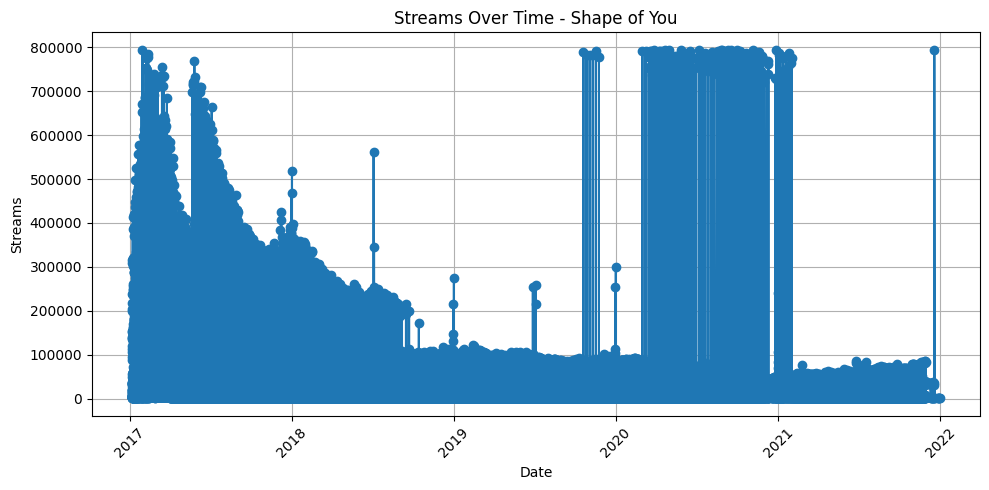

In [76]:
# Line Plot – Streams over time for a song

song = df[df['title'] == 'Shape of You'].sort_values('date')

plt.figure(figsize=(10, 5))
plt.plot(song['date'], song['streams'], marker='o')
plt.title("Streams Over Time - Shape of You")
plt.xlabel("Date")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

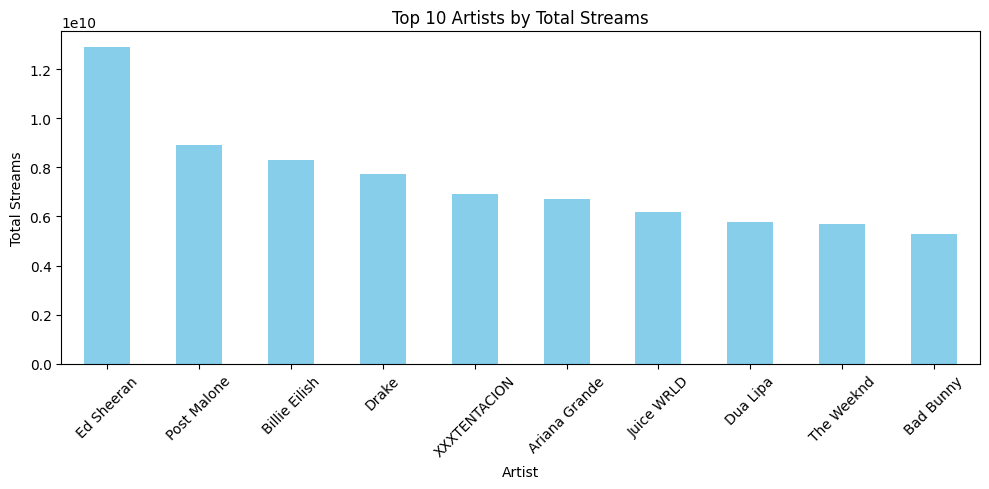

In [77]:
# Bar Plot – Top 10 artists by total streams

top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_artists.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists by Total Streams")
plt.xlabel("Artist")
plt.ylabel("Total Streams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

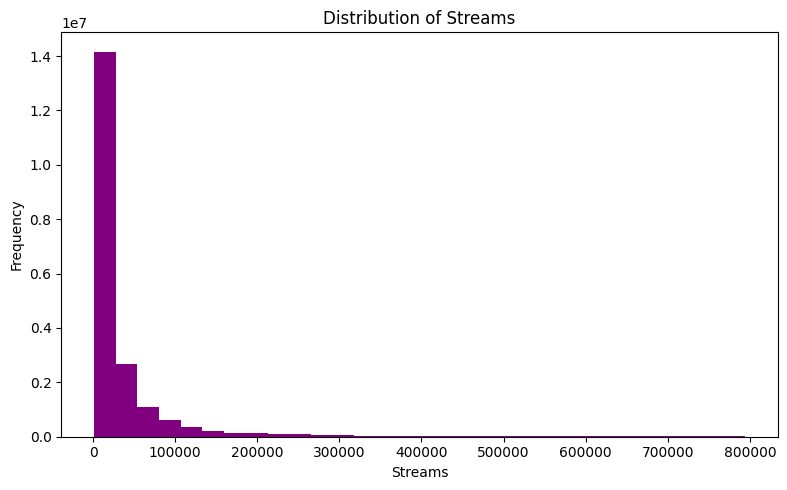

In [78]:
# Histogram – Distribution of Streams

plt.figure(figsize=(8, 5))
plt.hist(df['streams'], bins=30, color='purple')
plt.title("Distribution of Streams")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

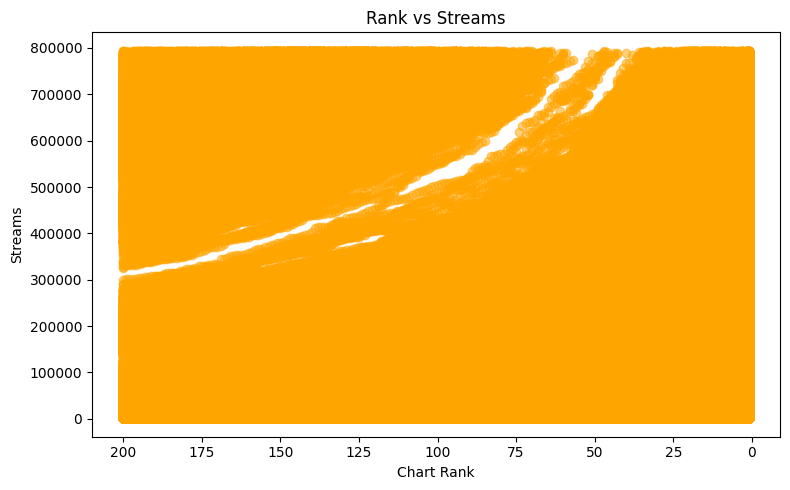

In [79]:
# Scatter Plot – Rank vs. Streams

plt.figure(figsize=(8, 5))
plt.scatter(df['rank'], df['streams'], alpha=0.5, color='orange')
plt.title("Rank vs Streams")
plt.xlabel("Chart Rank")
plt.ylabel("Streams")
plt.gca().invert_xaxis()  # Rank 1 on left
plt.tight_layout()
plt.show()

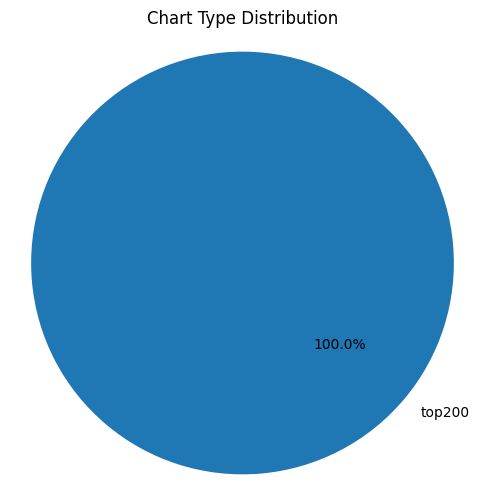

In [80]:
# Pie Chart – Chart Type Distribution

chart_counts = df['chart'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(chart_counts, labels=chart_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Chart Type Distribution")
plt.axis('equal')
plt.show()

In [81]:
# Seaborn Visualizations

In [82]:
import seaborn as sns

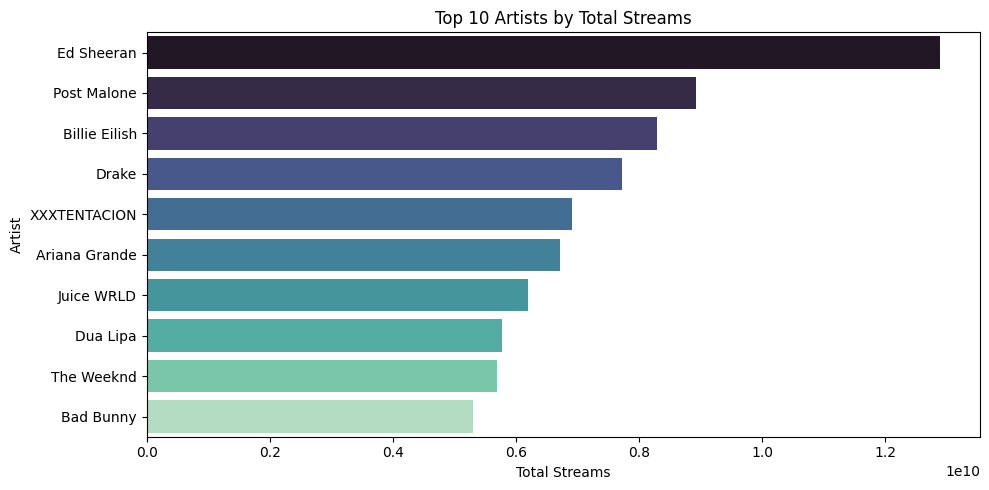

In [91]:
# Bar Plot – Top 10 Artists by Total Streams

top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='streams', y='artist', data=top_artists, palette='mako', hue='artist', legend=False)
plt.title("Top 10 Artists by Total Streams")
plt.xlabel("Total Streams")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

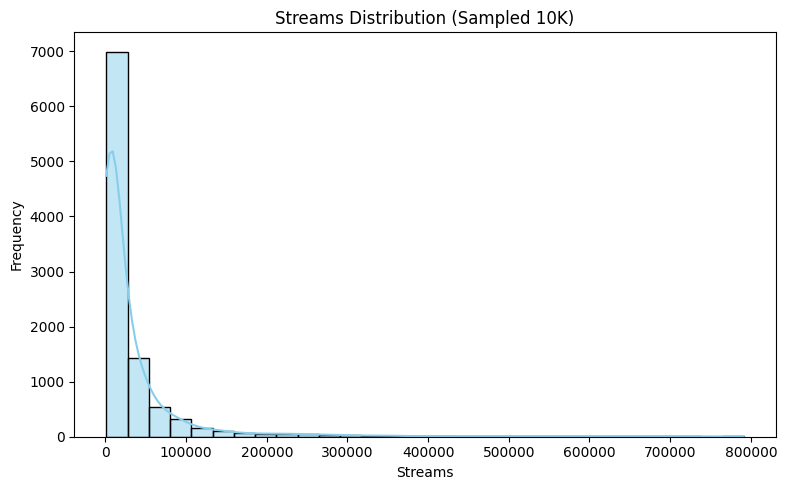

In [95]:
# Histogram / Distribution Plot

plt.figure(figsize=(8, 5))
sns.histplot(df['streams'].sample(10000, random_state=42), bins=30, kde=True, color='skyblue')
plt.title("Streams Distribution (Sampled 10K)")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

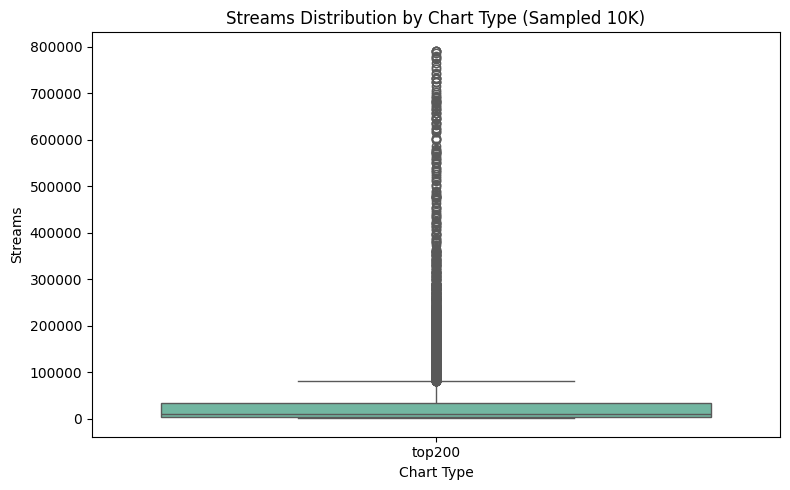

In [102]:
# Box Plot – Streams by Chart Type

plt.figure(figsize=(8, 5))
sampled_df = df.sample(10000, random_state=42)  # Sample 10k rows
sns.boxplot(x='chart', y='streams', data=sampled_df, hue='chart',legend=False, palette='Set2')
plt.title("Streams Distribution by Chart Type (Sampled 10K)")
plt.xlabel("Chart Type")
plt.ylabel("Streams")
plt.tight_layout()
plt.show()

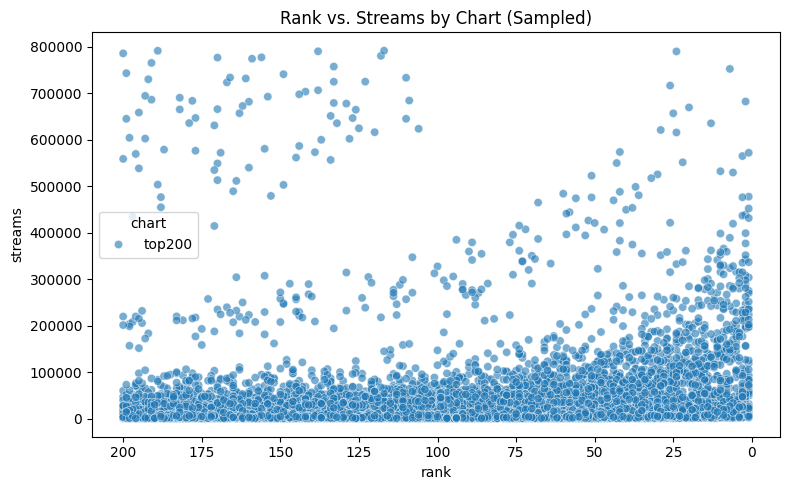

In [104]:
# Scatter Plot – Rank vs Streams

plt.figure(figsize=(8, 5))
sampled_df = df.sample(10000, random_state=42)  # Take a sample of 10K rows
sns.scatterplot(x='rank', y='streams', hue='chart', data=sampled_df, alpha=0.6)
plt.title("Rank vs. Streams by Chart (Sampled)")
plt.gca().invert_xaxis()  # Lower rank = better
plt.tight_layout()
plt.show()

In [105]:
# Advanced Seaborn Plot

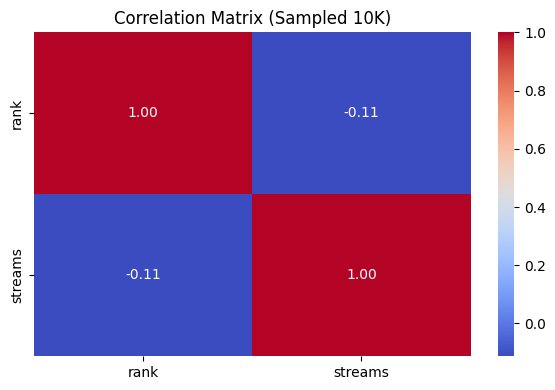

In [108]:
# Heatmap – Correlation Between Numeric Features

numeric_df = df[['rank', 'streams']].dropna()

numeric_df_sample = numeric_df.sample(10000, random_state=42)
corr = numeric_df_sample.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Sampled 10K)")
plt.tight_layout()
plt.show()

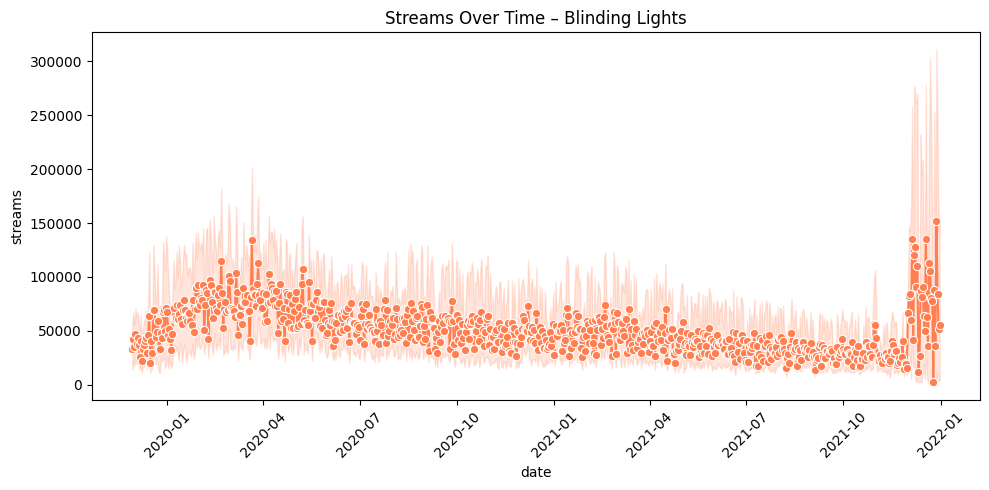

In [110]:
# Line Plot – Trend of Streams Over Time for Top Song 

top_song = top_song.sort_values('date').reset_index(drop=True)
sampled_top_song = top_song.iloc[::2]  # Take every 2nd row to reduce points by ~50%

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='streams', data=sampled_top_song, marker='o', color='coral')
plt.title(f"Streams Over Time – {top_song['title'].iloc[0]}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()